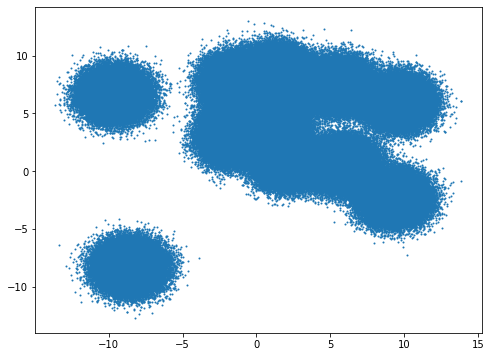

--- 0.7498922348022461 seconds ---


In [10]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import time

%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)

from sklearn.datasets import make_blobs

from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import figure, show

start_time = time.time()
centers = 12 #np.random.randint(9, 10)
X, y_true = make_blobs(n_samples=800000, centers=centers, cluster_std=1.0, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))



In [11]:
def apply_KMeans(nbr_of_clusters_guess, KMeans_function, data):
    guesses = []
    guess_error_rates = []
    for c in nbr_of_clusters_guess:
        k_means = KMeans_function(n_clusters=c)
        k_means.fit(data)
        clusters = k_means.predict(data)
        guesses.append(c)
        guess_error_rates.append(k_means.inertia_)
    #returning the "last" guessed "clusters"
    #TODO: return the best fit
    return clusters, guesses, guess_error_rates, 

In [12]:
from sklearn.cluster import KMeans as local_KMeans

--- 21.056569576263428 seconds ---


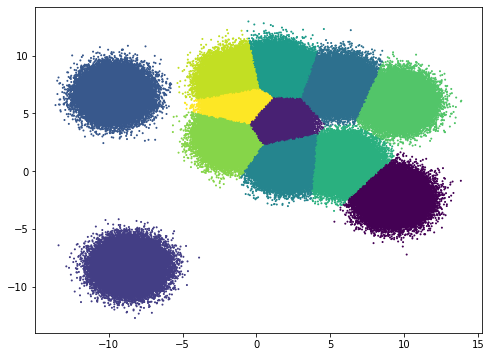

In [13]:
start_time = time.time()

clusters, guesses, guess_error_rates = apply_KMeans( 
                                  nbr_of_clusters_guess = [centers], #np.arange(1,15), #[centers],
                                  KMeans_function = local_KMeans,
                                  data = X)

print("--- %s seconds ---" % (time.time() - start_time))

plt.scatter(X[:, 0], X[:, 1], c=clusters, s=1)
plt.show()

In [8]:
#### Elbow Plot ####
#ax = figure().gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#plt.plot(guesses, guess_error_rates)
#plt.xlabel("Clusters")
#plt.ylabel("Error")
#plt.show()

In [17]:
from funcx.sdk.client import FuncXClient

fxc = FuncXClient()
endpoint_uuid = '...' 
function_uuid = '...'
items = [1, 2, 3, 4, 5]

res = fxc.run(items, endpoint_id=endpoint_uuid, function_id=function_uuid)
print(fxc.get_result(res))

15
